# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
#print(json.dumps(btc_response, indent=1))
current_btc_price = float(btc_response['data']['1']['quotes']['USD']['price'])


# Fetch current ETH price
eth_response = requests.get(eth_url).json()
#print(json.dumps(eth_response, indent=2))
current_eth_price = float(eth_response['data']['1027']['quotes']['USD']['price'])


# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $34356.00
The current value of your 5.3 ETH is $9734.19


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_key,
    alpaca_secret,
    api_version = "v2")
print(alpaca_secret)

7NqaFCTOOUgAu6MY5YDGvP841xVphlcdqfF2smo3


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2023-03-22", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
portfolio = api.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df
print (portfolio)

# Reorganize the DataFrame
# Separate ticker data
AGG = portfolio[portfolio['symbol']=='AGG'].drop('symbol',axis=1)
SPY = portfolio[portfolio['symbol']=='SPY'].drop('symbol',axis=1)



# Concatenate the ticker DataFrames
stock_portfolio = pd.concat([AGG,SPY],axis='columns', keys=['AGG','SPY'])

# Preview DataFrame
stock_portfolio


                             open    high     low   close     volume  \
timestamp                                                              
2023-03-22 04:00:00+00:00   98.80   99.82   98.64   99.75    7543191   
2023-03-22 04:00:00+00:00  398.73  402.49  392.07  392.11  110476617   

                           trade_count        vwap symbol  
timestamp                                                  
2023-03-22 04:00:00+00:00        37672   99.275949    AGG  
2023-03-22 04:00:00+00:00       863473  397.590293    SPY  


AGG                                            \
                           open   high    low  close   volume trade_count   
timestamp                                                                   
2023-03-22 04:00:00+00:00  98.8  99.82  98.64  99.75  7543191       37672   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-03-22 04:00:00+00:00  99.275949  398.73  402.49  392.07  392.11   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-03-22 04:00:00+00:00  110476617      863473  397.590293

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(stock_portfolio['AGG']['close'])
spy_close_price = float(stock_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $99.75
Current SPY closing price: $392.11


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19605.50
The current value of your 200 AGG shares is $19950.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
my_shares = (my_spy_value + my_agg_value)
my_crypto = (my_btc_value + my_eth_value)
df_savings = {
    'amount':[my_shares,my_crypto],
    'shares':[my_shares],
    'crypto':[my_crypto]
}

# Create savings DataFrame
df_savings = pd.DataFrame(df_savings, index=['shares', 'crypto'], columns=['amount'])

# Display savings DataFrame
display(df_savings)

,amount
shares,39555.500
crypto,44090.192


<AxesSubplot:title={'center':' Personal Savings'}, ylabel='amount'>

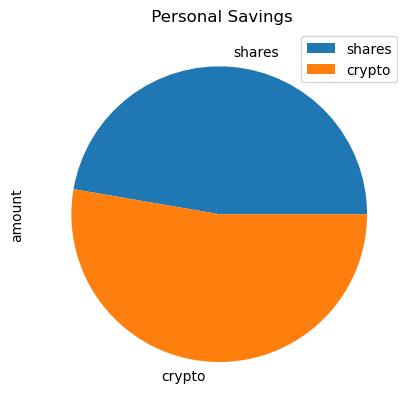

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title=" Personal Savings")


In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings =  my_shares + my_crypto

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations you have enough money in this fund.')
elif total_savings == emergency_fund:
    print('Congrats you reached this financial goal.')
elif total_savings < emergency_fund:
    print(f'You are ${(emergency_fund-total_savings)} away from reaching your saving goal of ${emergency_fund}.')


Congratulations you have enough money in this fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-03-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-03-23', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
port_history = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = port_history[port_history['symbol']=='AGG'].drop('symbol',axis=1)
SPY = port_history[port_history['symbol']=='SPY'].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
port_history = pd.concat([AGG, SPY],axis='columns', keys=['AGG', 'SPY'])

# Display sample data
port_history.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720   
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   
2018-03-28 04:00:00+00:00  107.05  107.10  106.88  106.94  5617206   
2018-03-29 04:00:00+00:00  106.95  107.26  106.95  107.25  9199453   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2018-03-23 04:00:00+00:00       11823  106.607241  264.17  265.02  257.8300   
2018-03-26 04:00:00+00:00       19722  106.583861  262.13  265.43  259.4100   
2018-03-27 04:00:00+00:00       14293  106.826049  266.17  266.77  258.8400   
2018-03-28 04:00:00+00:00       18689  106.978133  260.75  262.64  258.5800   
2018-03-29 04:00:00+00:00       20364  107.212902  261.12  265.26  259.8389   

                                                                       
                             close     volume trade_count        vwap  
timestamp                                                              
2018-03-23 04:00:00+00:00  258.015  183856351      624778  261.280967  
2018-03-26 04:00:00+00:00  265.140  143141239      450168  262.353110  
2018-03-27 04:00:00+00:00  260.760  130806695      538201  263.145788  
2018-03-28 04:00:00+00:00  259.850  146510333      590467  260.395684  
2018-03-29 04:00:00+00:00  263.430  125470572      436558  262.835186

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks = MCSimulation(
    portfolio_data = port_history,
    weights= [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 *30
)

In [26]:
# Printing the simulation input data
MC_stocks.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2018-03-23 04:00:00+00:00  106.46  106.70  106.46  106.61  3618720   
2018-03-26 04:00:00+00:00  106.64  106.71  106.47  106.57  4546535   
2018-03-27 04:00:00+00:00  106.63  106.95  106.61  106.88  4566884   
2018-03-28 04:00:00+00:00  107.05  107.10  106.88  106.94  5617206   
2018-03-29 04:00:00+00:00  106.95  107.26  106.95  107.25  9199453   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-03-23 04:00:00+00:00       11823  106.607241          NaN  264.17   
2018-03-26 04:00:00+00:00       19722  106.583861    -0.000375  262.13   
2018-03-27 04:00:00+00:00       14293  106.826049     0.002909  266.17   
2018-03-28 04:00:00+00:00       18689  106.978133     0.000561  260.75   
2018-03-29 04:00:00+00:00       20364  107.212902     0.002899  261.12   

                                                                             \
                             high       low    close     volume trade_count   
timestamp                                                                     
2018-03-23 04:00:00+00:00  265.02  257.8300  258.015  183856351      624778   
2018-03-26 04:00:00+00:00  265.43  259.4100  265.140  143141239      450168   
2018-03-27 04:00:00+00:00  266.77  258.8400  260.760  130806695      538201   
2018-03-28 04:00:00+00:00  262.64  258.5800  259.850  146510333      590467   
2018-03-29 04:00:00+00:00  265.26  259.8389  263.430  125470572      436558   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-03-23 04:00:00+00:00  261.280967          NaN  
2018-03-26 04:00:00+00:00  262.353110     0.027615  
2018-03-27 04:00:00+00:00  263.145788    -0.016520  
2018-03-28 04:00:00+00:00  260.395684    -0.003490  
2018-03-29 04:00:00+00:00  262.835186     0.013777

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\erics\OneDrive\All Work\ASU\02-Homework\Financial-planning\Starter_Code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005168,1.000571,0.998393,0.992665,0.994840,1.000810,1.004872,0.995488,0.987109,1.001013,...,1.008460,0.977944,0.996702,0.985610,0.999107,1.007030,1.022561,0.999463,0.996754,0.995885
2,0.998249,0.994102,1.003514,0.991578,1.008886,0.994098,0.996957,0.987841,0.982406,0.998220,...,1.013935,0.980197,0.992636,0.996615,0.994244,0.998934,1.016142,0.990929,0.992895,1.000213
3,0.999166,0.989227,1.016919,0.996223,1.022168,0.995497,0.996052,0.983267,0.989450,0.999345,...,1.016244,0.984847,0.992794,0.994087,0.980056,0.986647,1.013766,0.994538,0.983566,0.998771
4,1.011646,0.985558,1.025248,1.002288,1.008827,1.013928,0.998882,0.986405,0.993863,0.997698,...,1.011937,0.980835,0.991341,0.996039,0.976827,0.984878,1.016041,1.000070,0.988380,0.991355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.025623,1.171575,7.727100,15.528792,4.125241,5.143468,4.785331,2.477908,6.729552,10.879386,...,3.310315,4.135729,5.790383,7.446410,10.779330,2.565640,9.701614,2.176155,3.840623,7.696168
7557,2.016354,1.161472,7.635830,15.469505,4.029431,5.164961,4.811495,2.522959,6.668671,10.945612,...,3.299923,4.110254,5.769619,7.436580,10.726294,2.533788,9.639734,2.188013,3.874023,7.722406
7558,2.028484,1.165542,7.741755,15.446527,4.010981,5.137339,4.890157,2.489159,6.633162,10.914879,...,3.311690,4.084645,5.712338,7.460305,10.642808,2.501441,9.614032,2.182627,3.944415,7.840968
7559,2.018994,1.166516,7.793603,15.439837,3.978031,5.010500,4.911409,2.472307,6.720090,10.857112,...,3.349745,4.087161,5.736825,7.485187,10.691460,2.564871,9.472083,2.190993,3.946495,7.763490


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

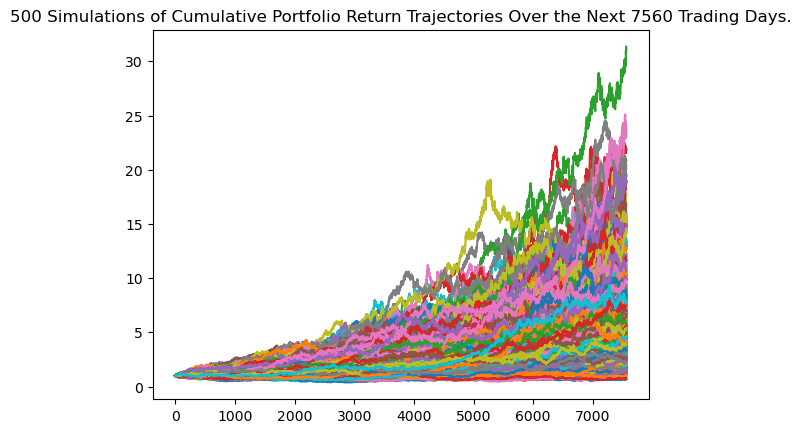

In [28]:
# Plot simulation outcomes
MC_stocks.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

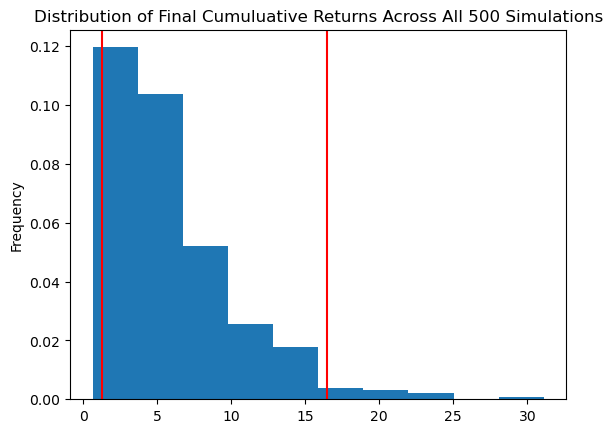

In [29]:
# Plot probability distribution and confidence intervals
MC_stocks.plot_distribution()

### Retirement Analysis

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_stocks.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              5.963094
std               4.339764
min               0.658233
25%               2.821623
50%               4.756907
75%               7.941294
max              31.106005
95% CI Lower      1.247756
95% CI Upper     16.497084
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(tbl[9]*20000,2)
ci_lower = round(tbl[8]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $24955.12 and $329941.69


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [33]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper = round(tbl[9]* initial_investment,2)
ci_lower = round(tbl[8]* initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $37432.68 and $494912.53


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = port_history,
    weights= [.40, .60],
    num_simulation = 500,
    num_trading_days = 252 *5
)

In [35]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\erics\OneDrive\All Work\ASU\02-Homework\Financial-planning\Starter_Code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993766,0.997646,0.989782,1.011724,0.991529,1.015784,1.005703,0.997850,0.993515,0.989894,...,1.014165,0.998398,0.997878,1.001805,1.015350,0.992517,0.990515,0.996708,0.997879,0.993329
2,0.992815,0.996177,0.993023,1.020933,0.994200,0.999983,1.001494,0.989564,0.979641,0.992434,...,1.023864,1.002119,0.985058,1.012093,1.015016,1.000687,0.988442,0.995298,0.992891,0.991186
3,0.980294,0.987381,0.995826,1.014793,0.991337,0.997652,0.997699,0.998209,0.986476,0.999110,...,1.028024,0.996677,0.977674,1.009427,1.025152,1.018713,0.979976,0.986115,0.977831,0.992506
4,0.978233,0.991533,1.006783,1.030702,0.992554,1.002075,0.993847,0.993483,0.981181,0.988768,...,1.034909,0.991234,0.982191,1.010675,1.024846,1.007481,0.982484,0.984204,0.966750,0.990974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.459945,0.585246,1.257960,1.687523,0.953715,0.669984,1.563370,1.378480,1.684148,2.101842,...,1.034158,2.091751,0.961347,1.303031,1.394757,1.111186,1.896757,0.597926,1.265836,1.170854
1257,1.444286,0.590174,1.258440,1.685448,0.950046,0.669205,1.563089,1.383430,1.696402,2.105409,...,1.017917,2.099523,0.960236,1.288906,1.382585,1.116367,1.889367,0.605547,1.250465,1.171658
1258,1.429488,0.588969,1.267673,1.676243,0.949315,0.667576,1.564387,1.383929,1.707203,2.110754,...,1.020923,2.108860,0.956817,1.308474,1.377270,1.112551,1.917805,0.599929,1.247636,1.165206
1259,1.444321,0.594450,1.245599,1.700033,0.939632,0.677021,1.592723,1.385364,1.721680,2.087243,...,1.016726,2.105529,0.962384,1.299506,1.388515,1.111247,1.884981,0.593715,1.254843,1.163666


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

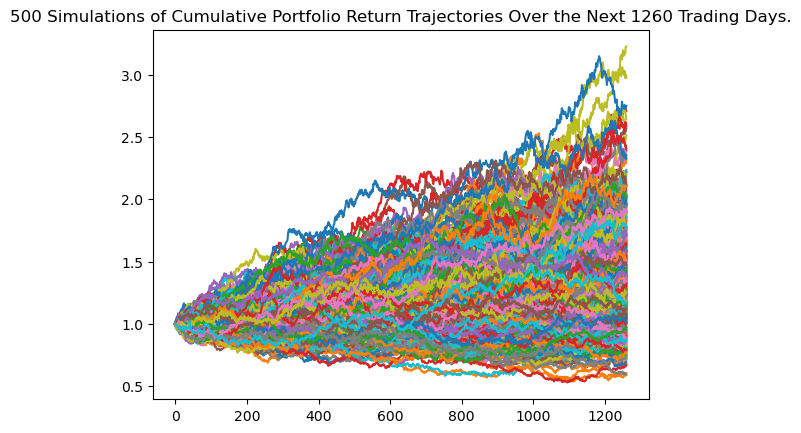

In [36]:
# Plot simulation outcomes
MC_5year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

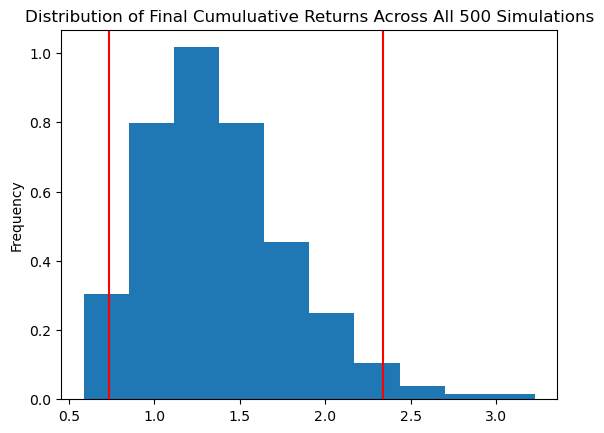

In [38]:
# Plot probability distribution and confidence intervals
MC_5year.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.376355
std               0.420918
min               0.588906
25%               1.077907
50%               1.315551
75%               1.619241
max               3.225291
95% CI Lower      0.732736
95% CI Upper      2.338251
Name: 1260, dtype: float64


In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $14654.73 and $46765.02


### Ten Years Retirement Option

In [41]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data= port_history,
    weights=[.40,.60],
    num_simulation= 500,
    num_trading_days= 252*10
)

In [42]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\erics\OneDrive\All Work\ASU\02-Homework\Financial-planning\Starter_Code\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988202,1.001168,0.997014,1.000360,0.996122,1.001718,1.001193,1.006614,0.981811,1.005979,...,1.000580,0.996257,0.999893,1.003905,1.003513,1.006554,0.998911,0.980382,0.992942,1.000005
2,0.996647,0.991139,0.992041,0.997493,1.010988,1.016369,0.993260,1.006436,0.978989,1.001347,...,0.990552,0.988060,1.002540,1.012197,1.003023,1.011205,0.993876,0.983813,0.989441,1.000687
3,0.988632,1.003065,0.989286,1.008693,1.001188,1.023191,0.990281,1.020036,0.961087,0.989878,...,0.989074,0.999208,1.007844,1.009406,1.010566,1.010502,1.000804,0.975220,0.985828,1.003500
4,0.983753,0.993643,0.976234,0.999172,1.019708,1.034429,0.993547,1.029767,0.953581,0.994287,...,0.974262,1.004809,1.000137,0.993399,1.019208,1.016135,1.004392,0.965227,0.981988,1.004675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.346099,1.926320,0.935031,1.565562,2.468447,2.682506,1.273444,1.299750,3.264332,0.833667,...,1.807640,1.829438,1.482510,0.875247,1.180869,1.068702,2.123816,3.557361,1.045552,2.000117
2517,1.325601,1.910831,0.933669,1.541326,2.465913,2.701786,1.288097,1.294259,3.254552,0.829564,...,1.819181,1.837094,1.472674,0.862374,1.164537,1.069071,2.101393,3.571098,1.059020,1.991777
2518,1.345359,1.896129,0.936934,1.537532,2.480549,2.699201,1.290214,1.301154,3.254529,0.830415,...,1.804118,1.811459,1.458983,0.866141,1.165052,1.072730,2.100793,3.554448,1.048885,1.964407
2519,1.339710,1.903311,0.920477,1.518032,2.498710,2.748242,1.294506,1.307591,3.298726,0.833186,...,1.819436,1.803963,1.477850,0.873459,1.166580,1.074904,2.094439,3.544571,1.047825,1.961868


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

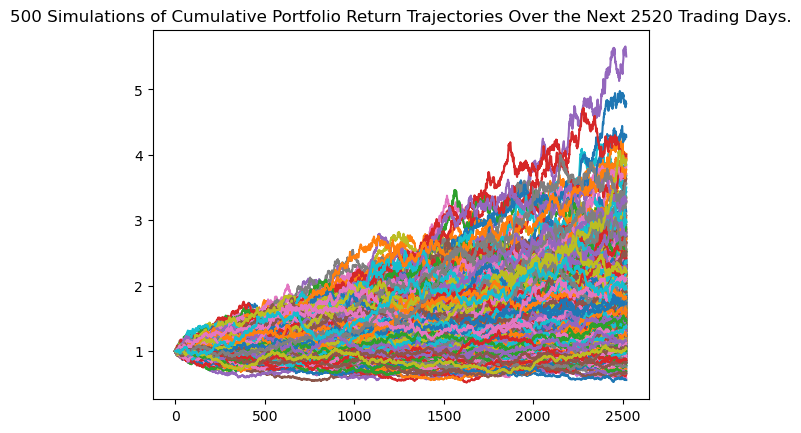

In [43]:
# Plot simulation outcomes
MC_10year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

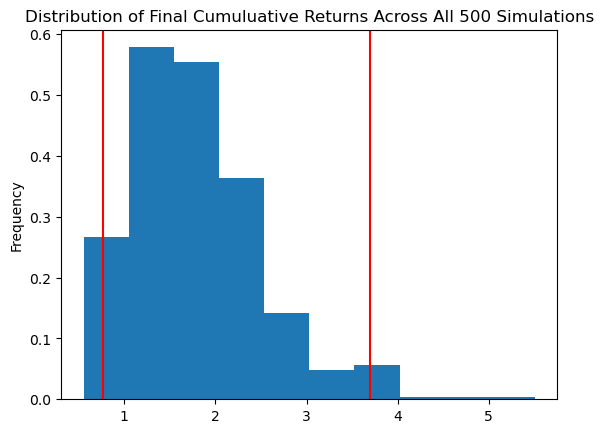

In [44]:
# Plot probability distribution and confidence intervals
MC_10year.plot_distribution()

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10year = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(tbl_10year)

count           500.000000
mean              1.790606
std               0.727304
min               0.559061
25%               1.293209
50%               1.670674
75%               2.187738
max               5.504311
95% CI Lower      0.768205
95% CI Upper      3.701370
Name: 2520, dtype: float64


In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $14654.73 and $46765.02
